# **Project Outline**
1. [Importing Libraries and Packages](#p1)
2. [Loading and Viewing Data Set](#p2)
3. [Dealing with NaN Values (Imputation)](#p3)
4. [Plotting and Visualizing Data](#p4)
5. [Feature Engineering](#p5)
6. [Feature Rescaling](#p6)
7. [Modeling and Predicting with sklearn](#p7)
8. [Evaluating Model Performances](#p8)

<a id="p1"></a>
# **1. Importing Libraries and Packages**

In [58]:
import numpy as np 
import pandas as pd 

import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import os 
print(os.listdir("../input"))

['train.csv', 'test.csv', 'gender_submission.csv']


<a id="p2"></a>
# **2. Loading and Viewing Data Set**


In [59]:
training = pd.read_csv("../input/train.csv")
testing = pd.read_csv("../input/test.csv")

In [60]:
training.head()

PassengerId  Survived  Pclass    ...        Fare Cabin  Embarked
0            1         0       3    ...      7.2500   NaN         S
1            2         1       1    ...     71.2833   C85         C
2            3         1       3    ...      7.9250   NaN         S
3            4         1       1    ...     53.1000  C123         S
4            5         0       3    ...      8.0500   NaN         S

[5 rows x 12 columns]

In [61]:
testing.head()

PassengerId  Pclass   ...    Cabin Embarked
0          892       3   ...      NaN        Q
1          893       3   ...      NaN        S
2          894       2   ...      NaN        Q
3          895       3   ...      NaN        S
4          896       3   ...      NaN        S

[5 rows x 11 columns]

This data looks very messy! We're going to have to preprocess it before it's ready to be used in Machine Learning models.

In [62]:
print(training.keys())
print(testing.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [63]:
types_train = training.dtypes
num_values = types_train[(types_train == float)]

print("These are the numerical features:")
print(num_values)

These are the numerical features:
Age     float64
Fare    float64
dtype: object


In [64]:
training.describe()

PassengerId    Survived     ...           Parch        Fare
count   891.000000  891.000000     ...      891.000000  891.000000
mean    446.000000    0.383838     ...        0.381594   32.204208
std     257.353842    0.486592     ...        0.806057   49.693429
min       1.000000    0.000000     ...        0.000000    0.000000
25%     223.500000    0.000000     ...        0.000000    7.910400
50%     446.000000    0.000000     ...        0.000000   14.454200
75%     668.500000    1.000000     ...        0.000000   31.000000
max     891.000000    1.000000     ...        6.000000  512.329200

[8 rows x 7 columns]

>**Note:** Only Age and Fare are the actual numerical values above and that the other features are just represented with numbers.

<a id="p3"></a>
# **3. Dealing with NaN Values (Imputation)**

In [65]:
def null_table(training, testing):
    print("Training Data Frame")
    print(pd.isnull(training).sum()) 
    print(" ")
    print("Testing Data Frame")
    print(pd.isnull(testing).sum())

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [66]:
training.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)
testing.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


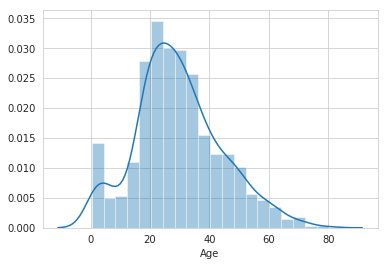

In [67]:
copy = training.copy()
copy.dropna(inplace = True)
sns.distplot(copy["Age"])

In [68]:
#the median will be an acceptable value to place in the NaN cells
training["Age"].fillna(training["Age"].median(), inplace = True)
testing["Age"].fillna(testing["Age"].median(), inplace = True) 
training["Embarked"].fillna("S", inplace = True)
testing["Fare"].fillna(testing["Fare"].median(), inplace = True)

null_table(training, testing)

Training Data Frame
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
 
Testing Data Frame
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [69]:
training.head()

PassengerId  Survived  Pclass    ...    Parch     Fare  Embarked
0            1         0       3    ...        0   7.2500         S
1            2         1       1    ...        0  71.2833         C
2            3         1       3    ...        0   7.9250         S
3            4         1       1    ...        0  53.1000         S
4            5         0       3    ...        0   8.0500         S

[5 rows x 10 columns]

In [70]:
testing.head()

PassengerId  Pclass   ...        Fare Embarked
0          892       3   ...      7.8292        Q
1          893       3   ...      7.0000        S
2          894       2   ...      9.6875        Q
3          895       3   ...      8.6625        S
4          896       3   ...     12.2875        S

[5 rows x 9 columns]

<a id="p4"></a>
# **4. Plotting and Visualizing Data**

**Gender**

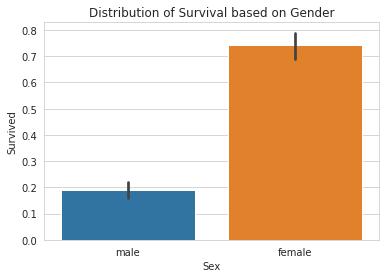

Total people survived is: 342
Proportion of Females who survived:
0.6812865497076024
Proportion of Males who survived:
0.31871345029239767


In [71]:
#can ignore the testing set for now
sns.barplot(x="Sex", y="Survived", data=training)
plt.title("Distribution of Survival based on Gender")
plt.show()

total_survived_females = training[training.Sex == "female"]["Survived"].sum()
total_survived_males = training[training.Sex == "male"]["Survived"].sum()

print("Total people survived is: " + str((total_survived_females + total_survived_males)))
print("Proportion of Females who survived:") 
print(total_survived_females/(total_survived_females + total_survived_males))
print("Proportion of Males who survived:")
print(total_survived_males/(total_survived_females + total_survived_males))

**Class**

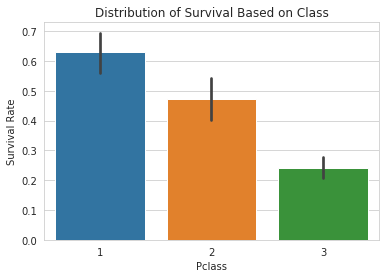

Total people survived is: 342
Proportion of Class 1 Passengers who survived:
0.39766081871345027
Proportion of Class 2 Passengers who survived:
0.2543859649122807
Proportion of Class 3 Passengers who survived:
0.347953216374269


In [72]:
sns.barplot(x="Pclass", y="Survived", data=training)
plt.ylabel("Survival Rate")
plt.title("Distribution of Survival Based on Class")
plt.show()

total_survived_one = training[training.Pclass == 1]["Survived"].sum()
total_survived_two = training[training.Pclass == 2]["Survived"].sum()
total_survived_three = training[training.Pclass == 3]["Survived"].sum()
total_survived_class = total_survived_one + total_survived_two + total_survived_three

print("Total people survived is: " + str(total_survived_class))
print("Proportion of Class 1 Passengers who survived:") 
print(total_survived_one/total_survived_class)
print("Proportion of Class 2 Passengers who survived:")
print(total_survived_two/total_survived_class)
print("Proportion of Class 3 Passengers who survived:")
print(total_survived_three/total_survived_class)

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

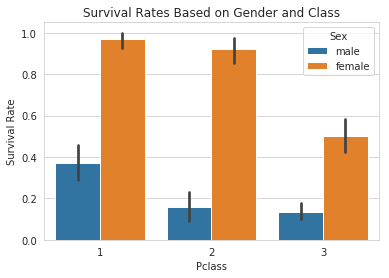

In [73]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

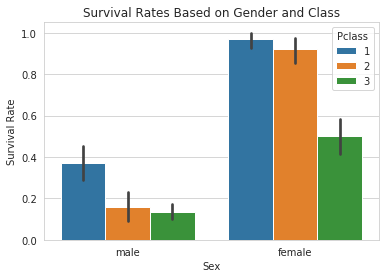

In [74]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

**Age**

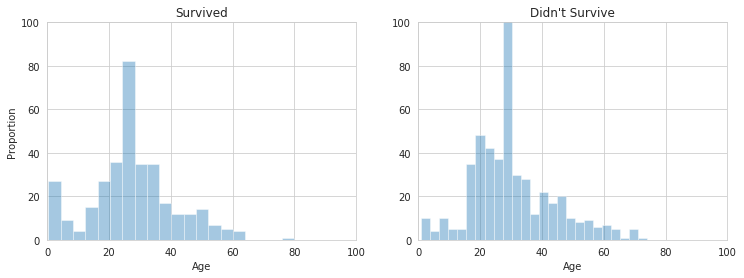

In [75]:
survived_ages = training[training.Survived == 1]["Age"]
not_survived_ages = training[training.Survived == 0]["Age"]
plt.subplot(1, 2, 1)
sns.distplot(survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Survived")
plt.ylabel("Proportion")
plt.subplot(1, 2, 2)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Didn't Survive")
plt.subplots_adjust(right=1.7)
plt.show()

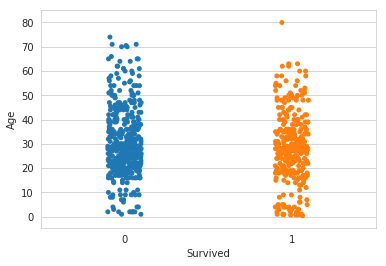

In [76]:
sns.stripplot(x="Survived", y="Age", data=training, jitter=True)

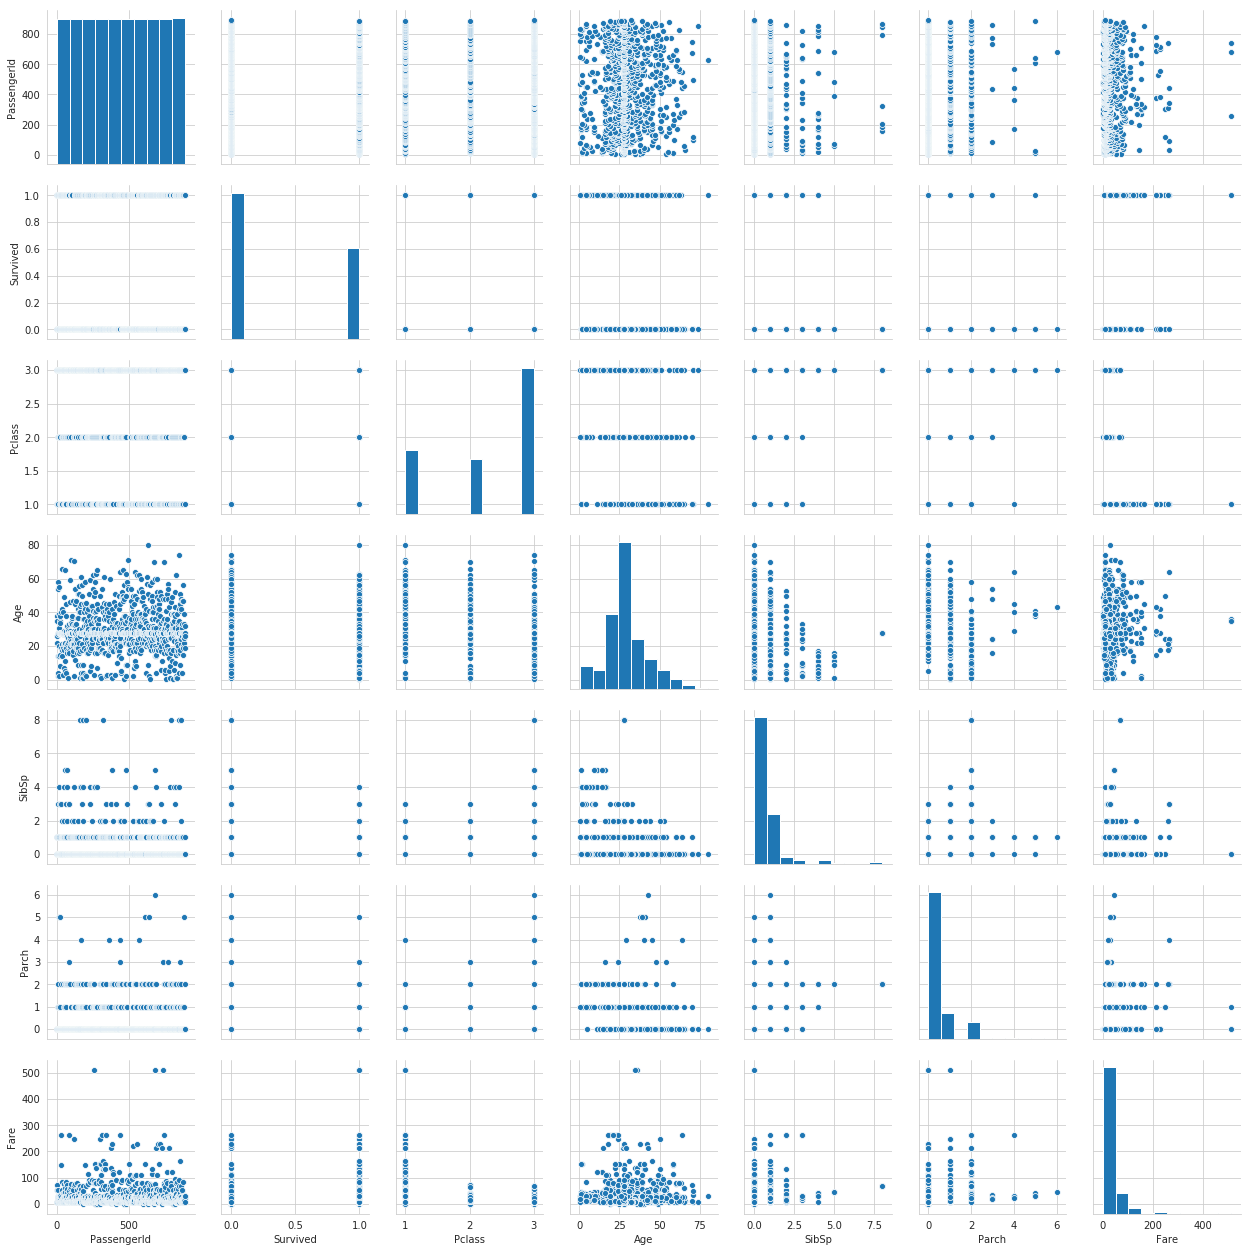

In [77]:
sns.pairplot(training)

<a id="p5"></a>
# **5. Feature Engineering**

In [78]:
training.sample(5)

PassengerId  Survived  Pclass    ...    Parch      Fare  Embarked
434          435         0       1    ...        0   55.9000         S
352          353         0       3    ...        1    7.2292         C
582          583         0       2    ...        0   26.0000         S
716          717         1       1    ...        0  227.5250         C
317          318         0       2    ...        0   14.0000         S

[5 rows x 10 columns]

In [79]:
testing.sample(5)

PassengerId  Pclass   ...        Fare Embarked
386         1278       3   ...      7.7750        S
204         1096       2   ...     10.5000        S
203         1095       2   ...     26.0000        S
269         1161       3   ...      8.6625        S
390         1282       1   ...     93.5000        S

[5 rows x 9 columns]

In [80]:
set(training["Embarked"])

{'C', 'Q', 'S'}

There are 3 values for Embarked: *S*, *C*, and *Q*. We will represent these with numbers as well.

In [81]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_sex.fit(training["Sex"])

encoded_sex_training = le_sex.transform(training["Sex"])
training["Sex"] = encoded_sex_training
encoded_sex_testing = le_sex.transform(testing["Sex"])
testing["Sex"] = encoded_sex_testing

le_embarked = LabelEncoder()
le_embarked.fit(training["Embarked"])

encoded_embarked_training = le_embarked.transform(training["Embarked"])
training["Embarked"] = encoded_embarked_training
encoded_embarked_testing = le_embarked.transform(testing["Embarked"])
testing["Embarked"] = encoded_embarked_testing

#Here's how to do it manually in Python without packages
"""
training.loc[training["Sex"] == "male", "Sex"] = 0
training.loc[training["Sex"] == "female", "Sex"] = 1

training.loc[training["Embarked"] == "S", "Embarked"] = 0
training.loc[training["Embarked"] == "C", "Embarked"] = 1
training.loc[training["Embarked"] == "Q", "Embarked"] = 2

testing.loc[testing["Sex"] == "male", "Sex"] = 0
testing.loc[testing["Sex"] == "female", "Sex"] = 1

testing.loc[testing["Embarked"] == "S", "Embarked"] = 0
testing.loc[testing["Embarked"] == "C", "Embarked"] = 1
testing.loc[testing["Embarked"] == "Q", "Embarked"] = 2
"""

'\ntraining.loc[training["Sex"] == "male", "Sex"] = 0\ntraining.loc[training["Sex"] == "female", "Sex"] = 1\n\ntraining.loc[training["Embarked"] == "S", "Embarked"] = 0\ntraining.loc[training["Embarked"] == "C", "Embarked"] = 1\ntraining.loc[training["Embarked"] == "Q", "Embarked"] = 2\n\ntesting.loc[testing["Sex"] == "male", "Sex"] = 0\ntesting.loc[testing["Sex"] == "female", "Sex"] = 1\n\ntesting.loc[testing["Embarked"] == "S", "Embarked"] = 0\ntesting.loc[testing["Embarked"] == "C", "Embarked"] = 1\ntesting.loc[testing["Embarked"] == "Q", "Embarked"] = 2\n'

In [82]:
training.sample(5)

PassengerId  Survived  Pclass    ...    Parch     Fare  Embarked
798          799         0       3    ...        0   7.2292         0
502          503         0       3    ...        0   7.6292         1
713          714         0       3    ...        0   9.4833         2
853          854         1       1    ...        1  39.4000         2
621          622         1       1    ...        0  52.5542         2

[5 rows x 10 columns]

In [83]:
testing.sample(5)

PassengerId  Pclass    ...        Fare  Embarked
337         1229       3    ...      7.2292         0
26           918       1    ...     61.9792         0
153         1045       3    ...     12.1833         2
79           971       3    ...      7.7500         1
150         1042       1    ...     83.1583         0

[5 rows x 9 columns]

## *Creating Synthetic Features*

In [84]:
training["FamSize"] = training["SibSp"] + training["Parch"] + 1
testing["FamSize"] = testing["SibSp"] + testing["Parch"] + 1

In [85]:
training["IsAlone"] = training.FamSize.apply(lambda x: 1 if x == 1 else 0)
testing["IsAlone"] = testing.FamSize.apply(lambda x: 1 if x == 1 else 0)

In [86]:
for name in training["Name"]:
    training["Title"] = training["Name"].str.extract("([A-Za-z]+)\.",expand=True)
    
for name in testing["Name"]:
    testing["Title"] = testing["Name"].str.extract("([A-Za-z]+)\.",expand=True)

In [87]:
training.head() #Title column added

PassengerId  Survived  Pclass  ...   FamSize  IsAlone  Title
0            1         0       3  ...         2        0     Mr
1            2         1       1  ...         2        0    Mrs
2            3         1       3  ...         1        1   Miss
3            4         1       1  ...         2        0    Mrs
4            5         0       3  ...         1        1     Mr

[5 rows x 13 columns]

In [88]:
titles = set(training["Title"]) #making it a set gets rid of all duplicates
print(titles)

{'Lady', 'Jonkheer', 'Mme', 'Miss', 'Sir', 'Rev', 'Mr', 'Master', 'Countess', 'Col', 'Mrs', 'Dr', 'Ms', 'Capt', 'Mlle', 'Don', 'Major'}


In [89]:
title_list = list(training["Title"])
frequency_titles = []

for i in titles:
    frequency_titles.append(title_list.count(i))
    
print(frequency_titles)

[1, 1, 1, 182, 1, 6, 517, 40, 1, 2, 125, 7, 1, 1, 2, 1, 2]


In [90]:
titles = list(titles)

title_dataframe = pd.DataFrame({
    "Titles" : titles,
    "Frequency" : frequency_titles
})

print(title_dataframe)

      Titles  Frequency
0       Lady          1
1   Jonkheer          1
2        Mme          1
3       Miss        182
4        Sir          1
5        Rev          6
6         Mr        517
7     Master         40
8   Countess          1
9        Col          2
10       Mrs        125
11        Dr          7
12        Ms          1
13      Capt          1
14      Mlle          2
15       Don          1
16     Major          2


In [91]:
title_replacements = {"Mlle": "Other", "Major": "Other", "Col": "Other", "Sir": "Other", "Don": "Other", "Mme": "Other",
          "Jonkheer": "Other", "Lady": "Other", "Capt": "Other", "Countess": "Other", "Ms": "Other", "Dona": "Other"}

training.replace({"Title": title_replacements}, inplace=True)
testing.replace({"Title": title_replacements}, inplace=True)

le_title = LabelEncoder()
le_title.fit(training["Title"])

encoded_title_training = le_title.transform(training["Title"])
training["Title"] = encoded_title_training
encoded_title_testing = le_title.transform(testing["Title"])
testing["Title"] = encoded_title_testing

#Again, here's how to do it manually
"""
training.loc[training["Title"] == "Miss", "Title"] = 0
training.loc[training["Title"] == "Mr", "Title"] = 1
training.loc[training["Title"] == "Mrs", "Title"] = 2
training.loc[training["Title"] == "Master", "Title"] = 3
training.loc[training["Title"] == "Dr", "Title"] = 4
training.loc[training["Title"] == "Rev", "Title"] = 5
training.loc[training["Title"] == "Other", "Title"] = 6

testing.loc[testing["Title"] == "Miss", "Title"] = 0
testing.loc[testing["Title"] == "Mr", "Title"] = 1
testing.loc[testing["Title"] == "Mrs", "Title"] = 2
testing.loc[testing["Title"] == "Master", "Title"] = 3
testing.loc[testing["Title"] == "Dr", "Title"] = 4
testing.loc[testing["Title"] == "Rev", "Title"] = 5
testing.loc[testing["Title"] == "Other", "Title"] = 6
"""

'\ntraining.loc[training["Title"] == "Miss", "Title"] = 0\ntraining.loc[training["Title"] == "Mr", "Title"] = 1\ntraining.loc[training["Title"] == "Mrs", "Title"] = 2\ntraining.loc[training["Title"] == "Master", "Title"] = 3\ntraining.loc[training["Title"] == "Dr", "Title"] = 4\ntraining.loc[training["Title"] == "Rev", "Title"] = 5\ntraining.loc[training["Title"] == "Other", "Title"] = 6\n\ntesting.loc[testing["Title"] == "Miss", "Title"] = 0\ntesting.loc[testing["Title"] == "Mr", "Title"] = 1\ntesting.loc[testing["Title"] == "Mrs", "Title"] = 2\ntesting.loc[testing["Title"] == "Master", "Title"] = 3\ntesting.loc[testing["Title"] == "Dr", "Title"] = 4\ntesting.loc[testing["Title"] == "Rev", "Title"] = 5\ntesting.loc[testing["Title"] == "Other", "Title"] = 6\n'

In [92]:
training.drop("Name", axis = 1, inplace = True)
testing.drop("Name", axis = 1, inplace = True)

In [93]:
training.sample(5)

PassengerId  Survived  Pclass  ...    FamSize  IsAlone  Title
354          355         0       3  ...          1        1      3
421          422         0       3  ...          1        1      3
158          159         0       3  ...          1        1      3
381          382         1       3  ...          3        0      2
510          511         1       3  ...          1        1      3

[5 rows x 12 columns]

In [94]:
testing.sample(5)

PassengerId  Pclass  Sex   Age  ...    Embarked  FamSize  IsAlone  Title
264         1156       2    1  30.0  ...           0        1        1      3
301         1193       2    1  27.0  ...           0        1        1      3
28           920       1    1  41.0  ...           2        1        1      3
163         1055       3    1  27.0  ...           2        1        1      3
146         1038       1    1  27.0  ...           2        1        1      3

[5 rows x 11 columns]

<a id="p6"></a>
# **6. Feature Rescaling**

In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#We need to reshape our data since the Scaler takes in arrays
ages_train = np.array(training["Age"]).reshape(-1, 1)
fares_train = np.array(training["Fare"]).reshape(-1, 1)
ages_test = np.array(testing["Age"]).reshape(-1, 1)
fares_test = np.array(testing["Fare"]).reshape(-1, 1)

training["Age"] = scaler.fit_transform(ages_train)
training["Fare"] = scaler.fit_transform(fares_train)
testing["Age"] = scaler.fit_transform(ages_test)
testing["Fare"] = scaler.fit_transform(fares_test)


In [96]:
training.head()

PassengerId  Survived  Pclass  Sex  ...    Embarked  FamSize  IsAlone  Title
0            1         0       3    1  ...           2        2        0      3
1            2         1       1    0  ...           0        2        0      4
2            3         1       3    0  ...           2        1        1      2
3            4         1       1    0  ...           2        2        0      4
4            5         0       3    1  ...           2        1        1      3

[5 rows x 12 columns]

In [97]:
testing.head()

PassengerId  Pclass  Sex       Age  ...    Embarked  FamSize  IsAlone  Title
0          892       3    1  0.386231  ...           1        1        1      3
1          893       3    0  1.371370  ...           2        2        0      4
2          894       2    1  2.553537  ...           1        1        1      3
3          895       3    1 -0.204852  ...           2        1        1      3
4          896       3    0 -0.598908  ...           2        3        0      4

[5 rows x 11 columns]

<a id="p7"></a>
# **7. Model Fitting, Optimizing, and Predicting**

**sklearn Models to Test**

In [98]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [99]:
from sklearn.metrics import make_scorer, accuracy_score 

In [100]:
from sklearn.model_selection import GridSearchCV

**Defining Features in Training/Test Set**

In [101]:
X_train = training.drop(labels=["PassengerId", "Survived"], axis=1) #define training features set
y_train = training["Survived"] #define training label set
X_test = testing.drop("PassengerId", axis=1) #define testing features set
#we don't have y_test, that is what we're trying to predict with our model

In [102]:
X_train.head()

Pclass  Sex       Age  SibSp  ...    Embarked  FamSize  IsAlone  Title
0       3    1 -0.565736      1  ...           2        2        0      3
1       1    0  0.663861      1  ...           0        2        0      4
2       3    0 -0.258337      0  ...           2        1        1      2
3       1    0  0.433312      1  ...           2        2        0      4
4       3    1  0.433312      0  ...           2        1        1      3

[5 rows x 10 columns]

**Validation Data Set**

In [103]:
from sklearn.model_selection import train_test_split #to create validation data set

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #X_valid and y_valid are the validation sets

**SVC Model**

In [104]:
svc_clf = SVC() 

parameters_svc = {"kernel": ["rbf", "linear"], "probability": [True, False], "verbose": [True, False]}

grid_svc = GridSearchCV(svc_clf, parameters_svc, scoring=make_scorer(accuracy_score))
grid_svc.fit(X_training, y_training)

svc_clf = grid_svc.best_estimator_

svc_clf.fit(X_training, y_training)
pred_svc = svc_clf.predict(X_valid)
acc_svc = accuracy_score(y_valid, pred_svc)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [105]:
print("The Score for SVC is: " + str(acc_svc))

The Score for SVC is: 0.8212290502793296


**LinearSVC Model**

In [106]:
linsvc_clf = LinearSVC()

parameters_linsvc = {"multi_class": ["ovr", "crammer_singer"], "fit_intercept": [True, False], "max_iter": [100, 500, 1000, 1500]}

grid_linsvc = GridSearchCV(linsvc_clf, parameters_linsvc, scoring=make_scorer(accuracy_score))
grid_linsvc.fit(X_training, y_training)

linsvc_clf = grid_linsvc.best_estimator_

linsvc_clf.fit(X_training, y_training)
pred_linsvc = linsvc_clf.predict(X_valid)
acc_linsvc = accuracy_score(y_valid, pred_linsvc)

print("The Score for LinearSVC is: " + str(acc_linsvc))

The Score for LinearSVC is: 0.7932960893854749


**RandomForest Model**

In [107]:
rf_clf = RandomForestClassifier()

parameters_rf = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], "criterion": ["gini", "entropy"], "max_features": ["auto", "sqrt", "log2"], 
                 "max_depth": [2, 3, 5, 10], "min_samples_split": [2, 3, 5, 10]}

grid_rf = GridSearchCV(rf_clf, parameters_rf, scoring=make_scorer(accuracy_score))
grid_rf.fit(X_training, y_training)

rf_clf = grid_rf.best_estimator_

rf_clf.fit(X_training, y_training)
pred_rf = rf_clf.predict(X_valid)
acc_rf = accuracy_score(y_valid, pred_rf)

print("The Score for Random Forest is: " + str(acc_rf))

The Score for Random Forest is: 0.8212290502793296


**LogisiticRegression Model**

In [108]:
logreg_clf = LogisticRegression()

parameters_logreg = {"penalty": ["l2"], "fit_intercept": [True, False], "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
                     "max_iter": [50, 100, 200], "warm_start": [True, False]}

grid_logreg = GridSearchCV(logreg_clf, parameters_logreg, scoring=make_scorer(accuracy_score))
grid_logreg.fit(X_training, y_training)

logreg_clf = grid_logreg.best_estimator_

logreg_clf.fit(X_training, y_training)
pred_logreg = logreg_clf.predict(X_valid)
acc_logreg = accuracy_score(y_valid, pred_logreg)

print("The Score for Logistic Regression is: " + str(acc_logreg))

The Score for Logistic Regression is: 0.8100558659217877


**KNeighbors Model**

In [109]:
knn_clf = KNeighborsClassifier()

parameters_knn = {"n_neighbors": [3, 5, 10, 15], "weights": ["uniform", "distance"], "algorithm": ["auto", "ball_tree", "kd_tree"],
                  "leaf_size": [20, 30, 50]}

grid_knn = GridSearchCV(knn_clf, parameters_knn, scoring=make_scorer(accuracy_score))
grid_knn.fit(X_training, y_training)

knn_clf = grid_knn.best_estimator_

knn_clf.fit(X_training, y_training)
pred_knn = knn_clf.predict(X_valid)
acc_knn = accuracy_score(y_valid, pred_knn)

print("The Score for KNeighbors is: " + str(acc_knn))

The Score for KNeighbors is: 0.770949720670391


**GaussianNB Model**

In [110]:
gnb_clf = GaussianNB()

parameters_gnb = {}

grid_gnb = GridSearchCV(gnb_clf, parameters_gnb, scoring=make_scorer(accuracy_score))
grid_gnb.fit(X_training, y_training)

gnb_clf = grid_gnb.best_estimator_

gnb_clf.fit(X_training, y_training)
pred_gnb = gnb_clf.predict(X_valid)
acc_gnb = accuracy_score(y_valid, pred_gnb)

print("The Score for Gaussian NB is: " + str(acc_gnb))

The Score for Gaussian NB is: 0.776536312849162


**DecisionTree Model**

In [111]:
dt_clf = DecisionTreeClassifier()

parameters_dt = {"criterion": ["gini", "entropy"], "splitter": ["best", "random"], "max_features": ["auto", "sqrt", "log2"]}

grid_dt = GridSearchCV(dt_clf, parameters_dt, scoring=make_scorer(accuracy_score))
grid_dt.fit(X_training, y_training)

dt_clf = grid_dt.best_estimator_

dt_clf.fit(X_training, y_training)
pred_dt = dt_clf.predict(X_valid)
acc_dt = accuracy_score(y_valid, pred_dt)

print("The Score for Decision Tree is: " + str(acc_dt))

The Score for Decision Tree is: 0.7486033519553073


**XGBoost Model**

In [112]:
from xgboost import XGBClassifier

xg_clf = XGBClassifier()

parameters_xg = {"objective" : ["reg:linear"], "n_estimators" : [5, 10, 15, 20]}

grid_xg = GridSearchCV(xg_clf, parameters_xg, scoring=make_scorer(accuracy_score))
grid_xg.fit(X_training, y_training)

xg_clf = grid_xg.best_estimator_

xg_clf.fit(X_training, y_training)
pred_xg = xg_clf.predict(X_valid)
acc_xg = accuracy_score(y_valid, pred_xg)

print("The Score for XGBoost is: " + str(acc_xg))

[23:58:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:58:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:58:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:58:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:58:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:58:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:58:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:58:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

<a id="p8"></a>
# **8. Evaluating Model Performances**

In [113]:
model_performance = pd.DataFrame({
    "Model": ["SVC", "Linear SVC", "Random Forest", 
              "Logistic Regression", "K Nearest Neighbors", "Gaussian Naive Bayes",  
              "Decision Tree", "XGBClassifier"],
    "Accuracy": [acc_svc, acc_linsvc, acc_rf, 
              acc_logreg, acc_knn, acc_gnb, acc_dt, acc_xg]
})

model_performance.sort_values(by="Accuracy", ascending=False)

Model  Accuracy
0                   SVC  0.821229
2         Random Forest  0.821229
3   Logistic Regression  0.810056
7         XGBClassifier  0.810056
1            Linear SVC  0.793296
5  Gaussian Naive Bayes  0.776536
4   K Nearest Neighbors  0.770950
6         Decision Tree  0.748603